**Read Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score

df = pd.read_csv('studentInfo.csv')
dfv = pd.read_csv('studentInfo.csv')

In [ ]:
#Display the dataset
df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


**Data Processing**

In [ ]:
# mapping strings to numeric values:
def numerical_data():
    df['code_module'] = df['code_module'].map({'AAA': 0, 'BBB': 1, 'CCC': 2, 'DDD': 3,'EEE': 4, 'FFF': 5,'GGG': 6   })
    df['gender'] = df['gender'].map({'M': 0, 'F': 1})
    df['code_presentation'] = df['code_presentation'].map({'2014J': 0, '2013J': 1,'2014B': 2, '2013B': 3 })
    df['region'] = df['region'].map({'Scotland': 0, 'East Anglian Region': 1, 'London Region': 2, 'South Region': 3,'North Western Region': 4, 'West Midlands Region': 5,'South West Region': 6,
                                    'East Midlands Region': 7, 'South East Region': 8, 'Wales ': 9, 'Yorkshire Region': 10, 'North Region': 11, 'Ireland': 12  })
    df['highest_education'] = df['highest_education'].map({'A Level or Equivalent': 0, 'Lower Than A Level': 1, 'HE Qualification': 2, 'No Formal quals': 3, 'Post Graduate Qualification':4})
    df['imd_band'] = df['imd_band'].map({'0-10%': 0, '10-20': 1, '20-30%': 2, '30-40%': 3,'40-50%': 4, '50-60%': 5,'60-70%': 6 ,'70-80%': 7, '80-90%': 8,'90-100%': 9  })
    df['age_band'] = df['age_band'].map({'0-35': 0, '35-55': 1, '55<=': 2})
    df['disability'] = df['disability'].map({'N': 0, 'Y': 1})
    df['final_result'] = df['final_result'].map({'Distinction': 3, 'Pass': 2, 'Fail': 1, 'Withdrawn':0})


    # reorder dataframe columns :
    col = df['final_result']
    del df['final_result']
    df['final_result'] = col

    
# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

In [ ]:
# All values in numerical after calling numerical_data() function
numerical_data()
df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,1,11391,0,1.0,2,9.0,2,0,240,0,2
1,0,1,28400,1,0.0,2,2.0,1,0,60,0,2
2,0,1,30268,1,4.0,0,3.0,1,0,60,1,0
3,0,1,31604,1,8.0,0,5.0,1,0,60,0,2
4,0,1,32885,1,5.0,1,5.0,0,0,60,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,6,0,2640965,1,NaN,1,1.0,0,0,30,0,1
32589,6,0,2645731,1,1.0,1,4.0,1,0,30,0,3
32590,6,0,2648187,1,3.0,0,2.0,0,0,30,1,2
32591,6,0,2679821,1,8.0,1,9.0,1,0,30,0,0


In [ ]:
# Handle missing data
#Show missing data
df.isnull().sum().sort_values(ascending=False).head()

region             2086
imd_band           1111
final_result          0
disability            0
studied_credits       0
dtype: int64

In [ ]:
#fill in the missing data with the mean
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df), columns=df.columns)

df.isnull().sum().sort_values(ascending=False).head(10)

final_result            0
disability              0
studied_credits         0
num_of_prev_attempts    0
age_band                0
imd_band                0
highest_education       0
region                  0
gender                  0
id_student              0
dtype: int64

In [ ]:
#Feature Scaling
feature_scaling(df)

df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0.0,0.333333,-0.255925,0.0,-3.153784e-01,0.50,0.532050,1.0,0.0,0.244643,0.0,0.666667
1,0.0,0.333333,-0.249665,1.0,-3.987118e-01,0.50,-0.245728,0.5,0.0,-0.030166,0.0,0.666667
2,0.0,0.333333,-0.248977,1.0,-6.537844e-02,0.00,-0.134617,0.5,0.0,-0.030166,1.0,0.000000
3,0.0,0.333333,-0.248485,1.0,2.679549e-01,0.00,0.087606,0.5,0.0,-0.030166,0.0,0.666667
4,0.0,0.333333,-0.248014,1.0,1.795490e-02,0.25,0.087606,0.0,0.0,-0.030166,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,6.0,0.000000,0.711970,1.0,6.069219e-15,0.25,-0.356839,0.0,0.0,-0.075967,0.0,0.333333
32589,6.0,0.000000,0.713725,1.0,-3.153784e-01,0.25,-0.023505,0.5,0.0,-0.075967,0.0,1.000000
32590,6.0,0.000000,0.714629,1.0,-1.487118e-01,0.00,-0.245728,0.0,0.0,-0.075967,1.0,0.666667
32591,6.0,0.000000,0.726272,1.0,2.679549e-01,0.25,0.532050,0.5,0.0,-0.075967,0.0,0.000000


**DATA VISUALIZATION**

In [ ]:
df.shape


(32593, 12)

In [ ]:
df.dropna().shape

(32593, 12)

In [ ]:
df.columns


Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

In [ ]:
features = ['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result']


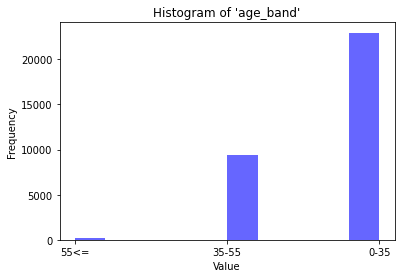

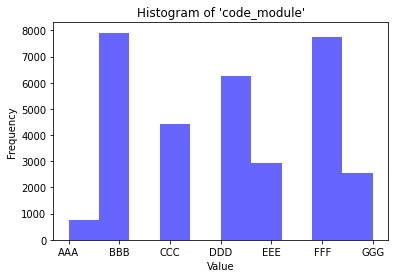

In [ ]:
def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.6)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(dfv['age_band'])
plot_histogram(dfv['code_module'])



Text(0.5, 1.0, 'Correlation Heatmap')

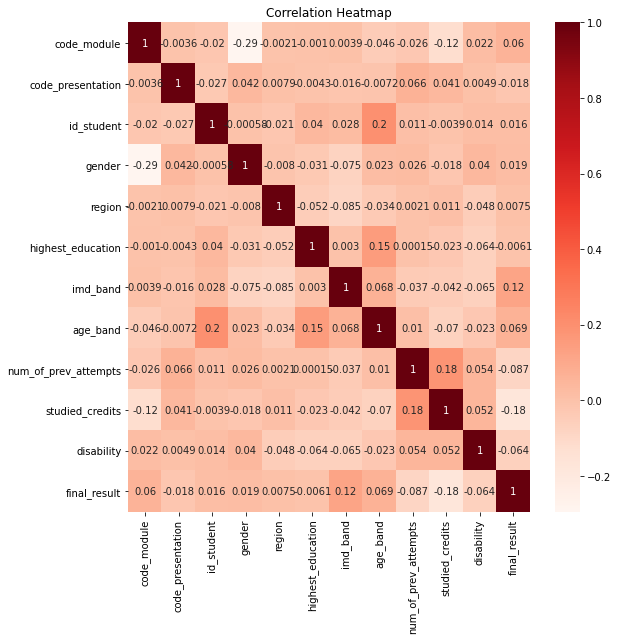

In [125]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=12)

In [ ]:
print(dfv['highest_education'].value_counts().sort_values(ascending=False))


A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64


<Figure size 432x288 with 0 Axes>

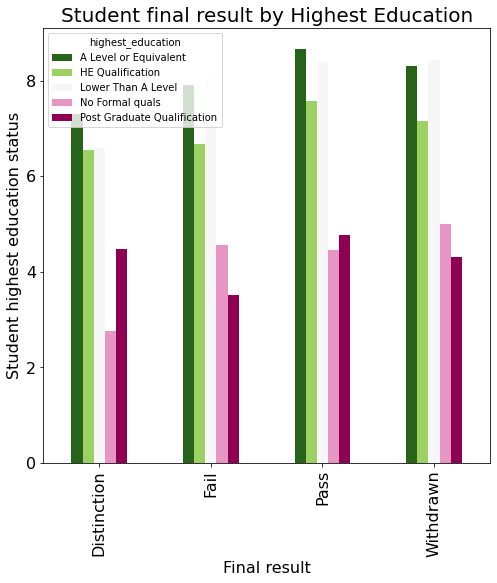

In [120]:
#highest education status
perc = (lambda col: col/col.sum())
education_tab1 = pd.crosstab(index=dfv.final_result, columns=dfv.highest_education)
education_tab = np.log(education_tab1)
#education_tab = education_tab.apply(perc).reindex(index)
plt.figure()
education_tab.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Student final result by Highest Education', fontsize=20)
plt.ylabel('Student highest education status', fontsize=16)
plt.xlabel('Final result', fontsize=16)
plt.show()

In [ ]:
print(dfv['age_band'].value_counts().sort_values(ascending=False))


0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64


<Figure size 432x288 with 0 Axes>

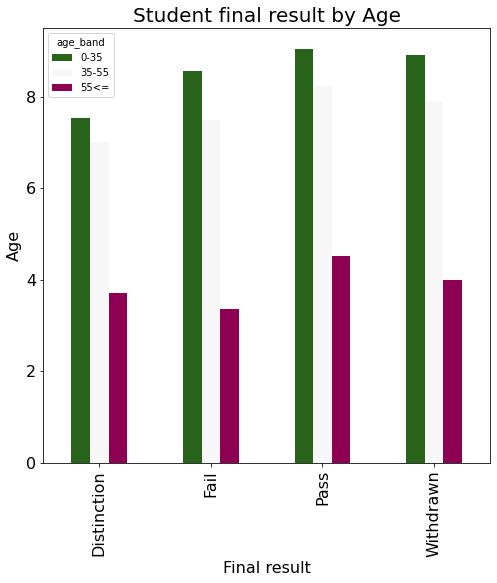

In [ ]:
#Age
perc = (lambda col: col/col.sum())
#index = [0,1]
education_tab1 = pd.crosstab(index=dfv.final_result, columns=dfv.age_band)
education_tab = np.log(education_tab1)
#education_perc = education_tab.apply(perc).reindex(index)
plt.figure()
education_tab.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Student final result by Age', fontsize=20)
plt.ylabel('Age', fontsize=16)
plt.xlabel('Final result', fontsize=16)
plt.show()

In [ ]:
#The distribution of students
print(dfv['region'].value_counts().sort_values(ascending=False))


Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64


In [ ]:
print(dfv['code_module'].value_counts().sort_values(ascending=False))


BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64


<Figure size 432x288 with 0 Axes>

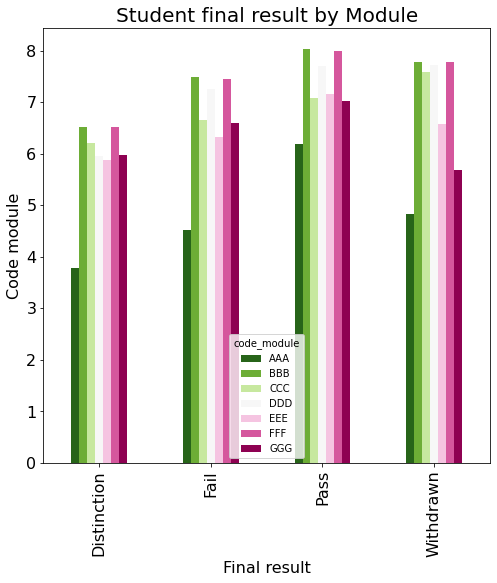

In [126]:
#perc = (lambda col: col/col.sum())
module_tab1 = pd.crosstab(index=dfv.final_result, columns=dfv.code_module)
module_tab = np.log(module_tab1)
plt.figure()
module_tab.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Student final result by Module', fontsize=20)
plt.ylabel('Code module', fontsize=16)
plt.xlabel('Final result', fontsize=16)
plt.show()

**GENERAL CONCLUSION**
1. The A Level or Equivalent & Lower Than A Level are targeted users: High school, Secondary school and University students.
2. There is a strong relationship between student highest education and their final result: The A Level or Equivalent has higher rate of Distinction and Pass while The Lower than A level has higher rate of Fail.
3. The most popular users are 0-35 years old.
4. Regions of students are distributed quite similar.
5. Module BBB and FFF are the most favorite/ popular courses.
